In [1]:
import json
import numpy as np 

from matplotlib import pyplot as plt 
import seaborn as sns


In [2]:
from collections import defaultdict
A_IDX = 2
B_IDX = 5
def process_json(path):
    with open(path) as f1:
        data = json.load(f1)

    to_ret = defaultdict(list)
    for instance in data: 
        instance = instance
        src = [x[0] for x in instance['source_tokens']][1:]
        src_str = "".join(src)
        # only consider "b" examples
        if "b" not in src:
            continue
        probs = np.array(instance['prob_dist'])
        prob_a = probs[:, A_IDX]
        prob_b = probs[:, B_IDX]
        idx_of_interest = [x[0] for x in instance['next_token']].index("Func2")
        prob_of_interest = prob_b[idx_of_interest]
        to_ret[src_str].append(prob_of_interest)
    return to_ret 

def get_dataset_prior(path):
    # let's define the prior as the ratio of b's to a's at a particular position in a sequence of length n
    with open(path) as f1:
        train_lines = [''.join(x.strip().split(" ")) for x in f1.readlines()]
    types = set(train_lines)
    # max_len = max([len(x) for x in types])
    max_len = 14
    count_dict = defaultdict(int)
    for line in train_lines:
        count_dict[line] += 1
    ratio_dict = {}
    for seq_len in range(1, max_len): 
        base_string = ["a" for i in range(seq_len)]
        for position in range(0, seq_len): 
            b_string = [x for x in base_string]
            b_string[position] = 'b'
            # for now, just use relative frequency of a string
            ratio_dict["".join(b_string)] =  count_dict["".join(base_string)] / len(train_lines)

    return ratio_dict


In [3]:
import pathlib

root_dir = pathlib.Path("/home/t-eliass/amlt_models/synthetic_two_function_seq2seq/Func2_12_seed/")
data_dir = pathlib.Path("/home/t-eliass/resources/data/synthetic_two_piece_balanced_same/seq2seq/Func2/")

all_probs = []
all_ratios = []

for file in root_dir.glob("*/translate_output/test_probs.json"):
    probs = process_json(file)
    split = file.parent.parent.name
    data_path = data_dir.joinpath(split, "train.src_tok") 
    ratio_dict = get_dataset_prior(data_path)
    for prob_key in probs.keys():
        ratio = ratio_dict[prob_key]
        all_probs.append(np.mean(probs[prob_key]))
        all_ratios.append(ratio)







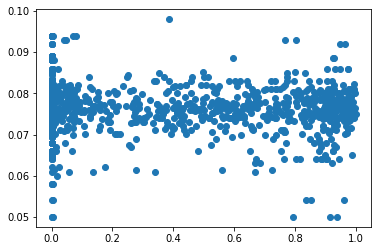

In [10]:



fig, ax = plt.subplots()
ax.scatter(x=all_probs, y=all_ratios) 
#(xs=all_ratios, ys=all_probs)


In [ ]:
print(min(all_ratios))

In [ ]:
print(min(all_probs))